In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

##Q2
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [3]:
#You have to make sure that you were able to write the file to a csv while your were working in R
house=pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

,date,state,unemploy_perc,house_price_index,house_price_perc
0,1976-01-01,Alabama,6.7,37.138285,0.040405
1,1976-02-01,Alabama,6.7,37.756437,0.051806
2,1976-03-01,Alabama,6.6,38.276319,0.059302
3,1976-04-01,Alabama,6.5,38.596135,0.059585
4,1976-05-01,Alabama,6.4,38.740517,0.055723


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [6]:
#states = ['Michigan', 'California', 'Texas', 'Indiana']
#your code goes here
mich = house[house['state'].str.contains('Michigan')]
cali = house[house['state'].str.contains('California')]
tex = house[house['state'].str.contains('Texas')]
indi = house[house['state'].str.contains('Indiana')]

statesdf = [mich, cali, tex, indi]
finalstates = pd.concat(statesdf)

housedata = finalstates

housedata["date"] = pd.to_datetime(housedata["date"])

housedata.head()
#print(states.dtypes)


,date,state,unemploy_perc,house_price_index,house_price_perc
11088,1976-01-01,Michigan,9.9,25.211087,0.029244
11089,1976-02-01,Michigan,9.9,25.266469,0.016700
11090,1976-03-01,Michigan,9.9,25.400494,0.010444
11091,1976-04-01,Michigan,9.8,25.575379,0.010598
11092,1976-05-01,Michigan,9.6,25.686491,0.013325


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

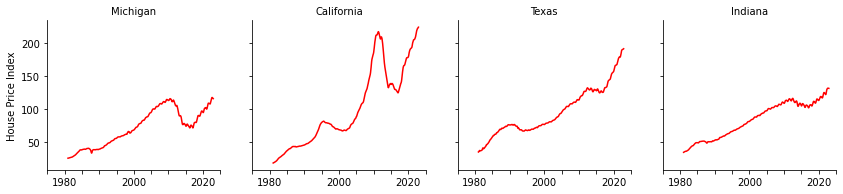

In [9]:
from datetime import date
#your code goes here

g = sns.FacetGrid(housedata, col = "state", hue="state", palette=(['#FF0000','#FF0000','#FF0000','#FF0000']))
g.map(sns.lineplot, "date", "house_price_index")

g.set_xticklabels(['','1980','','','','2000','','','','2020'])

g.set_titles("{col_name}") 
g.set_axis_labels(x_var="", y_var="House Price Index")


c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

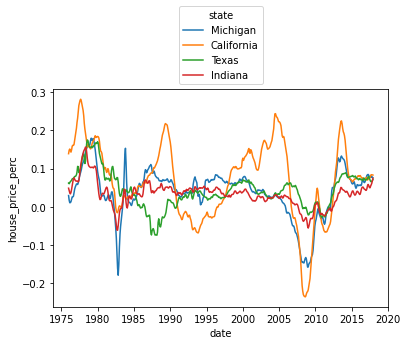

In [13]:
#your code goes here
p1 = sns.lineplot(data=housedata, x='date', y='house_price_perc', hue='state')

sns.move_legend(p1, "lower center", bbox_to_anchor=(.5,1))

##Q4
Please work on your 2nd question below. Please feel free to add new code cells.

In [14]:
#Your code goes here.
world_cup = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
world_cup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [15]:
htdf = world_cup.groupby("Home Team Initials")
atdf = world_cup.groupby("Away Team Initials")

htcountdf = htdf.count()
atcountdf = atdf.count()

In [16]:
htdfgames = htcountdf.filter(['Home Team Initials','MatchID'], axis=1)
atdfgames = atcountdf.filter(['Away Team Initials', 'MatchId'], axis=1)

htdfgames.head()

,MatchID
Home Team Initials,
ALG,6
ANG,1
ARG,54
AUS,6
AUT,13


In [18]:
hometeamDF = world_cup.groupby("Home Team Initials")
hometeamgoalsDF = hometeamDF.sum('Home Team Goals')

awayteamDF = world_cup.groupby("Away Team Initials")
awayteamgoalsDF = awayteamDF.sum('Away Team Goals')


In [20]:
hometeamgoalsumdf = hometeamgoalsDF.filter(['Home Team Initials', 'Home Team Goals'], axis = 1)
awayteamgoalsumdf = awayteamgoalsDF.filter(['Away Team Initials', 'Away Team Goals'], axis = 1)

In [22]:
#your code goes here. Just leaving an example output of an intermediate step for you to check the last two columns
team_pairsfirst = [hometeamgoalsDF, awayteamgoalsDF]
team_pairs = pd.concat(team_pairsfirst)

team_pairs.head()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
ALG,11960,5,10,153616.0,3,3,506855,600250207
ANG,2006,0,1,45000.0,0,1,97410100,97410008
ARG,107228,111,44,2915027.0,48,14,382685974,3381577258
AUS,11992,7,11,236788.0,1,5,98172208,997848331
AUT,25562,31,17,408402.0,14,10,6808,15446


Make sure that you only write four columns ('Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal') from the data frame, team_pairs, to a csv file

In [23]:
team_pairs.to_csv(index=True)

',Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID\nALG,11960,5,10,153616.0,3,3,506855,600250207\nANG,2006,0,1,45000.0,0,1,97410100,97410008\nARG,107228,111,44,2915027.0,48,14,382685974,3381577258\nAUS,11992,7,11,236788.0,1,5,98172208,997848331\nAUT,25562,31,17,408402.0,14,10,6808,15446\nBEL,35908,27,16,935282.0,10,7,44979307,1244727410\nBIH,2014,3,1,48011.0,1,0,255931,300186464\nBOL,1994,1,3,63089.0,0,1,337,3075\nBRA,162480,180,78,4539969.0,66,40,568789060,4467625806\nBUL,13886,11,10,384269.0,3,5,5676,15492\nCAN,1986,0,1,65500.0,0,0,308,468\nCHI,27644,25,11,468783.0,9,6,762743,900339005\nCHN,2002,0,2,27217.0,0,0,43950100,43950012\nCIV,6030,5,3,143301.0,1,3,97915753,697658034\nCMR,22014,11,23,562388.0,3,8,88913824,1288408031\nCOL,14046,11,6,433286.0,4,4,1026129,1200766499\nCRC,14042,7,10,294997.0,2,4,186078455,1085869632\nCRO,6022,3,6,125451.0,1,1,141616131,441546505\nCUB,3876,5,4,15000.0,0,1,412,2313\nCZE,4012,0,4,95000.0,0,2,19